In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Рейтинг продаж видеоигр

Допустим вы являетесь владельцем игровой студии и перед вами встает вопрос в каком жанре разрабатывать игру. В параметрах вы можете указать свой примерный бюджет, желаемую прибыль, регион на который вы ориентируетесь, год выпуска и так далее. Модель подберет вам оптимальный жанр игры.

## 1. Загружаем данные

In [2]:
url = "https://raw.githubusercontent.com/Vodeneev/ML/main/2018_Financial_Data.csv"
data_raw = pd.read_csv(url)

In [3]:
data_raw.shape

(4392, 225)

### Первые 5 строк датасета

In [4]:
data_raw.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


### Последние 5 строк датасета

In [5]:
data_raw.tail()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
4387,YRIV,0.0,0.0000,0.0,0.0,0.0,3755251.0,3755251.0,-3755251.0,11058486.0,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,556000.0,-0.4110,0.0,556000.0,4759000.0,5071000.0,9830000.0,-9274000.0,0.0,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,54884381.0,0.2210,36593792.0,18290589.0,1652633.0,7020320.0,8672953.0,9617636.0,1239170.0,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,0.0,0.0000,0.0,0.0,10317153.0,4521349.0,16648628.0,-16648628.0,0.0,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0
4391,ZYME,53019000.0,0.0243,0.0,53019000.0,56684000.0,29457000.0,86146000.0,-33127000.0,166000.0,...,-0.4185,0.0000,0.8519,0.1325,0.0000,0.3577,0.5880,Healthcare,209.462222,1


Столбцы признаки имеют имена 
- Revenue - доход
- Revenue Growth - рост доходов
- Gross Profit - валовая прибыль

И другие специальные финансовые показатели 

In [6]:
data_raw.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2019 PRICE VAR [%]', 'Class'],
      dtype='object', length=225)

In [7]:
data_raw.dtypes

Unnamed: 0               object
Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
                         ...   
R&D Expense Growth      float64
SG&A Expenses Growth    float64
Sector                   object
2019 PRICE VAR [%]      float64
Class                     int64
Length: 225, dtype: object

### Отбор числовых колонок

In [8]:
data_raw_numeric = data_raw.select_dtypes(include=[np.number])
numeric_cols = data_raw_numeric.values
print(numeric_cols)

[[ 9.45070000e+10  1.11500000e-01  0.00000000e+00 ...  1.30800000e-01
   3.27945734e+01  1.00000000e+00]
 [ 1.41440000e+10  3.20000000e-02  7.28800000e+09 ... -1.26500000e-01
   4.05880678e+01  1.00000000e+00]
 [ 7.08480000e+10  1.28900000e-01  2.71110000e+10 ... -9.42000000e-02
   3.02955138e+01  1.00000000e+00]
 ...
 [ 5.48843810e+07  2.21000000e-01  3.65937920e+07 ...  8.98700000e-01
  -1.78344001e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.45700000e-01
  -7.35200000e+01  0.00000000e+00]
 [ 5.30190000e+07  2.43000000e-02  0.00000000e+00 ...  5.88000000e-01
   2.09462222e+02  1.00000000e+00]]


In [9]:
data_raw_numeric

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,32.794573,1
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,40.588068,1
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,30.295514,1
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.0000,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,64.213737,1
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2619,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0.0000,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,-90.962099,0
4388,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.0000,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,-77.922077,0
4389,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0.0000,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,-17.834400,0
4390,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,NaN,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,-73.520000,0


### Отбор нечисловых колонок

In [10]:
data_raw_non_numeric = data_raw.select_dtypes(exclude=[np.number])
non_numeric_cols = data_raw_non_numeric.columns.values
print(non_numeric_cols)

['Unnamed: 0' 'Sector']


In [11]:
data_raw_non_numeric

,Unnamed: 0,Sector
0,CMCSA,Consumer Cyclical
1,KMI,Energy
2,INTC,Technology
3,MU,Technology
4,GE,Industrials
...,...,...
4387,YRIV,Real Estate
4388,YTEN,Basic Materials
4389,ZKIN,Basic Materials
4390,ZOM,Industrials


## Отсутствующие данные

In [12]:
for col in data_raw.columns:
    pct_missing = np.mean(data_raw[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Revenue - 1%
Revenue Growth - 3%
Cost of Revenue - 4%
Gross Profit - 1%
R&D Expenses - 5%
SG&A Expense - 4%
Operating Expenses - 4%
Operating Income - 1%
Interest Expense - 4%
Earnings before Tax - 2%
Income Tax Expense - 3%
Net Income - Non-Controlling int - 6%
Net Income - Discontinued ops - 6%
Net Income - 3%
Preferred Dividends - 6%
Net Income Com - 3%
EPS - 1%
EPS Diluted - 1%
Weighted Average Shs Out - 2%
Weighted Average Shs Out (Dil) - 5%
Dividend per Share - 6%
Gross Margin - 1%
EBITDA Margin - 7%
EBIT Margin - 4%
Profit Margin - 7%
Free Cash Flow margin - 6%
EBITDA - 4%
EBIT - 3%
Consolidated Income - 3%
Earnings Before Tax Margin - 1%
Net Profit Margin - 4%
Cash and cash equivalents - 1%
Short-term investments - 4%
Cash and short-term investments - 3%
Receivables - 1%
Inventories - 4%
Total current assets - 4%
Property, Plant & Equipment Net - 4%
Goodwill and Intangible Assets - 3%
Long-term investments - 4%
Tax assets - 5%
Total non-current assets - 24%
Tota

Удалим столбцы, в которых содержится более 25% пропусков

In [13]:
cols_to_drop = ['priceCashFlowRatio', 'priceEarningsToGrowthRatio', 'enterpriseValueMultiple', 'effectiveTaxRate',
                'returnOnAssets', 'returnOnCapitalEmployed', 'nIperEBT', 'eBTperEBIT', 'operatingCycle',
                'cashConversionCycle', 'freeCashFlowOperatingCashFlowRatio', 'shortTermCoverageRatios', 'dividendPayoutRatio', 
               'Current ratio', 'ROIC', 'Return on Tangible Assets', 'Working Capital', '10Y Revenue Growth (per Share)', 
               '10Y Operating CF Growth (per Share)', '10Y Net Income Growth (per Share)',
                '10Y Shareholders Equity Growth (per Share)', '10Y Dividend per Share Growth (per Share)', 
               'niperEBT', 'ebtperEBIT']
data_raw_less_hos_beds_raion = data_raw.drop(cols_to_drop, axis=1)

Вот как теперь выглядит наш датасет

In [14]:
data_raw_less_hos_beds_raion

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


In [15]:
for col in data_raw_less_hos_beds_raion.columns:
    pct_missing = np.mean(data_raw_less_hos_beds_raion[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Revenue - 1%
Revenue Growth - 3%
Cost of Revenue - 4%
Gross Profit - 1%
R&D Expenses - 5%
SG&A Expense - 4%
Operating Expenses - 4%
Operating Income - 1%
Interest Expense - 4%
Earnings before Tax - 2%
Income Tax Expense - 3%
Net Income - Non-Controlling int - 6%
Net Income - Discontinued ops - 6%
Net Income - 3%
Preferred Dividends - 6%
Net Income Com - 3%
EPS - 1%
EPS Diluted - 1%
Weighted Average Shs Out - 2%
Weighted Average Shs Out (Dil) - 5%
Dividend per Share - 6%
Gross Margin - 1%
EBITDA Margin - 7%
EBIT Margin - 4%
Profit Margin - 7%
Free Cash Flow margin - 6%
EBITDA - 4%
EBIT - 3%
Consolidated Income - 3%
Earnings Before Tax Margin - 1%
Net Profit Margin - 4%
Cash and cash equivalents - 1%
Short-term investments - 4%
Cash and short-term investments - 3%
Receivables - 1%
Inventories - 4%
Total current assets - 4%
Property, Plant & Equipment Net - 4%
Goodwill and Intangible Assets - 3%
Long-term investments - 4%
Tax assets - 5%
Total non-current assets - 24%
Tota

In [16]:
clear_data = data_raw_less_hos_beds_raion
clear_data

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


Заполним пропуски в остальных признаках их медианным значением

In [17]:
df_numeric = clear_data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = clear_data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        med = clear_data[col].median()
        clear_data[col] =clear_data[col].fillna(med)

imputing missing values for: Revenue
imputing missing values for: Revenue Growth
imputing missing values for: Cost of Revenue
imputing missing values for: Gross Profit
imputing missing values for: R&D Expenses
imputing missing values for: SG&A Expense
imputing missing values for: Operating Expenses
imputing missing values for: Operating Income
imputing missing values for: Interest Expense
imputing missing values for: Earnings before Tax
imputing missing values for: Income Tax Expense
imputing missing values for: Net Income - Non-Controlling int
imputing missing values for: Net Income - Discontinued ops
imputing missing values for: Net Income
imputing missing values for: Preferred Dividends
imputing missing values for: Net Income Com
imputing missing values for: EPS
imputing missing values for: EPS Diluted
imputing missing values for: Weighted Average Shs Out
imputing missing values for: Weighted Average Shs Out (Dil)
imputing missing values for: Dividend per Share
imputing missing valu

Теперь в нашем датасете не осталось пропусков

In [18]:
for col in clear_data.columns:
    pct_missing = np.mean(clear_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Revenue - 0%
Revenue Growth - 0%
Cost of Revenue - 0%
Gross Profit - 0%
R&D Expenses - 0%
SG&A Expense - 0%
Operating Expenses - 0%
Operating Income - 0%
Interest Expense - 0%
Earnings before Tax - 0%
Income Tax Expense - 0%
Net Income - Non-Controlling int - 0%
Net Income - Discontinued ops - 0%
Net Income - 0%
Preferred Dividends - 0%
Net Income Com - 0%
EPS - 0%
EPS Diluted - 0%
Weighted Average Shs Out - 0%
Weighted Average Shs Out (Dil) - 0%
Dividend per Share - 0%
Gross Margin - 0%
EBITDA Margin - 0%
EBIT Margin - 0%
Profit Margin - 0%
Free Cash Flow margin - 0%
EBITDA - 0%
EBIT - 0%
Consolidated Income - 0%
Earnings Before Tax Margin - 0%
Net Profit Margin - 0%
Cash and cash equivalents - 0%
Short-term investments - 0%
Cash and short-term investments - 0%
Receivables - 0%
Inventories - 0%
Total current assets - 0%
Property, Plant & Equipment Net - 0%
Goodwill and Intangible Assets - 0%
Long-term investments - 0%
Tax assets - 0%
Total non-current assets - 0%
Total

## Визуализация данных

Ниже представлены некоторые метрические характеристики числовых признаков:

    count - число значений
    mean - среднее арифметическое
    std - разброс
    min - минимальное значение
    max - максимальное значение



In [19]:
data = clear_data
data.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.392000e+03,4392.000000,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,...,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,5.070889e+09,3.348294,3.019809e+09,2.017404e+09,1.116492e+08,8.700160e+08,1.382972e+09,6.492430e+08,9.617840e+07,5.498570e+08,...,0.005631,35.730721,0.173395,1.323026,0.247941,9.331654,0.086472,0.148646,20.803948,0.693534
std,2.039284e+10,192.386514,1.477892e+10,7.629303e+09,9.079503e+08,3.594539e+09,5.418568e+09,2.957984e+09,3.704810e+08,2.618759e+09,...,0.230619,2313.709653,4.562670,34.258554,5.437007,352.622257,0.798925,0.815844,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.584545e+07,0.000000,5.607401e+06,3.737700e+07,0.000000e+00,2.170000e+07,4.624375e+07,-5.199308e+06,0.000000e+00,-9.525389e+06,...,0.000000,-0.041800,0.000000,-0.032200,-0.095025,-0.070100,0.000000,0.000000,-7.477173,0.000000
50%,4.982640e+08,0.074900,1.741180e+08,2.219470e+08,0.000000e+00,9.390450e+07,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,...,0.000000,0.010200,0.000000,0.034750,0.026100,0.000000,0.000000,0.065700,17.639393,1.000000
75%,2.424800e+09,0.181025,1.172762e+09,9.550422e+08,1.128625e+07,3.836575e+08,6.360000e+08,2.790345e+08,5.300975e+07,2.178985e+08,...,0.029025,0.178075,0.067550,0.146600,0.125575,0.098850,0.000000,0.155800,39.625879,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


Можно вычислить матрицу корреляции, чтобы выявить возможные связи признаков между собой

In [20]:
data

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


In [21]:
corr_mat = data.corr()
corr_mat

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
Revenue,1.000000,-0.003846,0.950555,0.812053,0.361043,0.699194,0.796207,0.637027,0.465237,0.649674,...,0.044368,-0.003768,-0.005218,-0.009002,-0.002535,-0.005639,-0.023901,-0.018848,0.005737,0.073761
Revenue Growth,-0.003846,1.000000,-0.003437,-0.004439,-0.001461,-0.004024,-0.004162,-0.005347,-0.004330,-0.005463,...,-0.000411,-0.000279,-0.000034,0.000075,0.000290,-0.000250,0.026038,0.001848,-0.003876,0.008847
Cost of Revenue,0.950555,-0.003437,1.000000,0.603439,0.254312,0.525204,0.606164,0.443602,0.388808,0.465317,...,0.031016,-0.002971,-0.003981,-0.007405,-0.003616,-0.005243,-0.021990,-0.014081,0.003687,0.059828
Gross Profit,0.812053,-0.004439,0.603439,1.000000,0.470486,0.849696,0.953594,0.829555,0.491179,0.835506,...,0.058613,-0.003905,-0.006082,-0.009816,0.000403,-0.004798,-0.020850,-0.022777,0.008192,0.078310
R&D Expenses,0.361043,-0.001461,0.254312,0.470486,1.000000,0.281958,0.424753,0.435026,0.107106,0.520734,...,0.021897,-0.001882,-0.002139,-0.004454,0.008886,-0.003134,0.009610,-0.001998,0.014093,0.050797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Debt Growth,-0.005639,-0.000250,-0.005243,-0.004798,-0.003134,-0.005377,-0.005763,-0.001952,-0.001298,-0.002056,...,-0.000506,-0.000411,-0.000591,-0.000926,0.088517,1.000000,-0.001187,0.128513,0.004621,0.013213
R&D Expense Growth,-0.023901,0.026038,-0.021990,-0.020850,0.009610,-0.019811,-0.020259,-0.017473,-0.023616,-0.015529,...,-0.000214,-0.001631,0.001038,-0.001427,0.005285,-0.001187,1.000000,0.077271,0.007040,-0.022226
SG&A Expenses Growth,-0.018848,0.001848,-0.014081,-0.022777,-0.001998,-0.012759,-0.016897,-0.028534,-0.018703,-0.024140,...,0.008857,-0.001454,0.024944,0.125066,0.071291,0.128513,0.077271,1.000000,-0.006467,-0.038946
2019 PRICE VAR [%],0.005737,-0.003876,0.003687,0.008192,0.014093,0.010857,0.002431,0.016496,0.002734,0.018268,...,0.006824,-0.000720,-0.006813,-0.006218,-0.005585,0.004621,0.007040,-0.006467,1.000000,0.423306


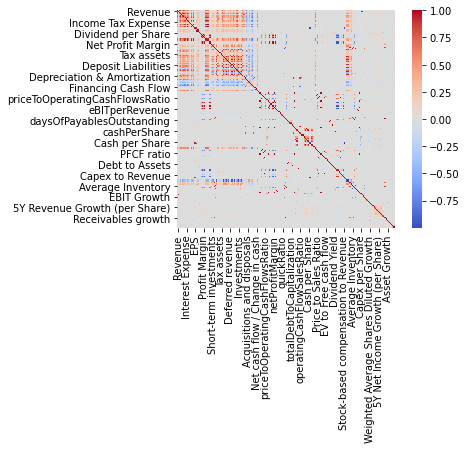

In [22]:
sns.heatmap(corr_mat, square=True, cmap="coolwarm")
pass

Уберем сильно коррелирующие признаки

In [23]:
drop_col = corr_mat.where(np.triu(corr_mat > 0.98, k=1)).stack()

In [24]:
drop_col

Earnings before Tax        EBIT                              0.981279
Net Income                 Net Income Com                    0.992243
                           Consolidated Income               0.998398
Net Income Com             Consolidated Income               0.990686
Weighted Average Shs Out   Weighted Average Shs Out (Dil)    0.989391
                                                               ...   
PB ratio                   PTB ratio                         1.000000
                           ROE                               0.999993
PTB ratio                  ROE                               0.999995
EV to Operating cash flow  Capex to Operating Cash Flow      0.996827
Tangible Asset Value       Invested Capital                  0.994040
Length: 81, dtype: float64

In [25]:
cols_to_drop = drop_col.index.droplevel(0).unique()

In [26]:
new_data = data.drop(cols_to_drop, axis=1)
data = new_data
data

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,3Y Dividend per Share Growth (per Share),Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2348,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,-0.2785,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.0772,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.0000,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2619,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.0000,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.0000,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.0000,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


Теперь признаки коррелируют между собой гораздо меньше

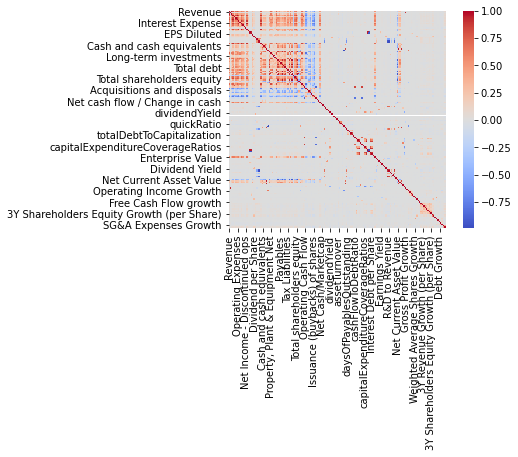

In [27]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, cmap="coolwarm")
pass

## Обработка категориальных признаков

In [28]:
new_data = data.drop('Unnamed: 0', axis=1)
new_data

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2348,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,-0.2785,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.0772,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.0000,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2619,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.0000,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0.0000,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,0.0000,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


### Бинаризация номинальных признаков

In [29]:
new_data = pd.get_dummies(new_data)
new_data

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0,1,0,0,0,0,0,0,0,0
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0,0,0,1,0,0,0,0,0,0
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0,0,0,0,0,0,0,0,1,0
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0,0,0,0,0,0,0,0,1,0
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0,0,0,0,0,0,0,1,0,0
4388,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0,0,0,0,0,0,0,0,0,0
4389,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0,0,0,0,0,0,0,0,0,0
4390,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,0,0,0,0,0,0,1,0,0,0


# Нормализация количественных признаков

In [30]:
data_stand = (new_data - new_data.mean(axis = 0))/new_data.std(axis = 0)
data_stand.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
count,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,...,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03
mean,-4.449550e-16,1.226314e-16,-1.148393e-15,-6.930046e-17,-3.262239e-15,-3.199538e-16,-1.615220e-16,1.963429e-16,-1.035033e-15,1.803228e-16,...,5.343833e-17,9.818345e-16,3.253949e-16,3.986628e-15,6.913843e-15,-9.717990e-16,5.526595e-16,-2.108906e-15,1.775472e-15,-1.481258e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.520409e-01,-3.539642e-02,-3.849310e-01,-5.027489e-01,-2.377324e-01,-2.810306e-01,-1.045105e+00,-5.140746e+00,-4.060750e+00,-8.523832e+00,...,-1.438003e-01,-3.608066e-01,-2.132018e-01,-2.446057e-01,-4.805092e-01,-4.320460e-01,-3.876935e-01,-2.482435e-01,-4.114493e-01,-1.541779e-01
25%,-2.454314e-01,-1.740400e-02,-2.039528e-01,-2.595292e-01,-1.229684e-01,-2.360013e-01,-2.466940e-01,-2.212461e-01,-2.596041e-01,-2.136059e-01,...,-1.438003e-01,-3.608066e-01,-2.132018e-01,-2.446057e-01,-4.805092e-01,-4.320460e-01,-3.876935e-01,-2.482435e-01,-4.114493e-01,-1.541779e-01
50%,-2.242270e-01,-1.701467e-02,-1.925507e-01,-2.353369e-01,-1.229684e-01,-2.159141e-01,-2.218939e-01,-2.052766e-01,-2.442363e-01,-1.995411e-01,...,-1.438003e-01,-3.608066e-01,-2.132018e-01,-2.446057e-01,-4.805092e-01,-4.320460e-01,-3.876935e-01,-2.482435e-01,-4.114493e-01,-1.541779e-01
75%,-1.297558e-01,-1.646305e-02,-1.249785e-01,-1.392475e-01,-1.105379e-01,-1.353048e-01,-1.378542e-01,-1.251557e-01,-1.165205e-01,-1.267618e-01,...,-1.438003e-01,-3.608066e-01,-2.132018e-01,-2.446057e-01,-4.805092e-01,-4.320460e-01,-3.876935e-01,-2.482435e-01,-4.114493e-01,-1.541779e-01
max,2.428657e+01,6.619826e+01,2.506112e+01,1.637497e+01,3.163758e+01,2.938902e+01,1.940126e+01,2.374886e+01,2.448660e+01,2.762880e+01,...,6.952504e+00,2.770937e+00,4.689324e+00,4.087282e+00,2.080652e+00,2.314041e+00,2.578770e+00,4.027386e+00,2.429880e+00,6.484539e+00


In [33]:
new_data.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
count,4.392000e+03,4392.000000,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,...,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,5.070889e+09,3.348294,3.019809e+09,2.017404e+09,1.116492e+08,8.700160e+08,1.382972e+09,6.492430e+08,9.617840e+07,5.498570e+08,...,0.020264,0.115209,0.043488,0.056466,0.187614,0.157332,0.130692,0.058060,0.144809,0.023224
std,2.039284e+10,192.386514,1.477892e+10,7.629303e+09,9.079503e+08,3.594539e+09,5.418568e+09,2.957984e+09,3.704810e+08,2.618759e+09,...,0.140918,0.319311,0.203977,0.230846,0.390448,0.364155,0.337102,0.233884,0.351948,0.150632
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.584545e+07,0.000000,5.607401e+06,3.737700e+07,0.000000e+00,2.170000e+07,4.624375e+07,-5.199308e+06,0.000000e+00,-9.525389e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.982640e+08,0.074900,1.741180e+08,2.219470e+08,0.000000e+00,9.390450e+07,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.424800e+09,0.181025,1.172762e+09,9.550422e+08,1.128625e+07,3.836575e+08,6.360000e+08,2.790345e+08,5.300975e+07,2.178985e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Классификация

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

В качестве обучающей выборки возьмем 75% данных, остальные 25% включим в тестовую.

In [35]:
X = new_data.drop(["Class"], 1)
y = new_data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5924)
y_train

72      0
3746    0
3823    0
4004    1
1125    0
       ..
2236    1
1329    1
2854    0
3896    1
589     1
Name: Class, Length: 3294, dtype: int64

## K ближайших соседей

In [36]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.7856709168184578, test 0.6930783242258652
Mean-squared error: train 0.2143290831815422, test 0.3069216757741348


In [38]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.8348512446873103, test 0.6375227686703097
Mean-squared error: train 0.16514875531268974, test 0.36247723132969034


## Random forest

In [39]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 1.0, test 0.9963570127504554
Mean-squared error: train 0.0, test 0.0036429872495446266


## Выводы:

Результатами я доволен, Рандом Форест работает куда лучше, чем метод К ближайших соседей)